In [1]:
#load the libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
del_data = pd.read_csv("delivery_time.csv")
del_data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
del_data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
del_data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [7]:
del_data.shape

(21, 2)

<AxesSubplot:>

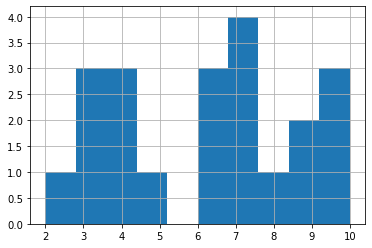

In [11]:
# histogram 
del_data['Sorting Time'].hist()

<AxesSubplot:>

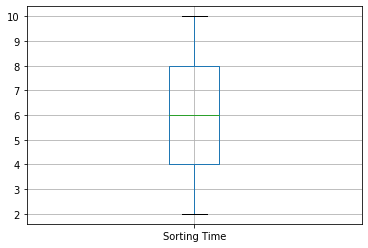

In [12]:
#Box plot
del_data.boxplot(column=['Sorting Time'])

<AxesSubplot:>

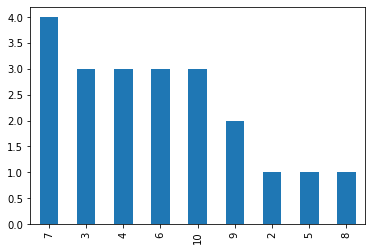

In [14]:
#Bar plot
del_data['Sorting Time'].value_counts().plot.bar()

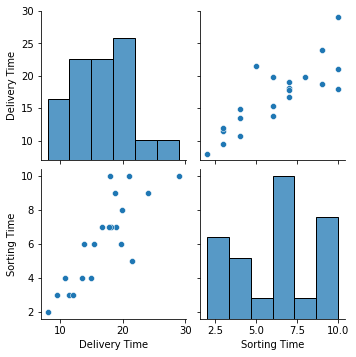

In [15]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(del_data)

In [16]:
#Correlation
del_data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\Users\kamali\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

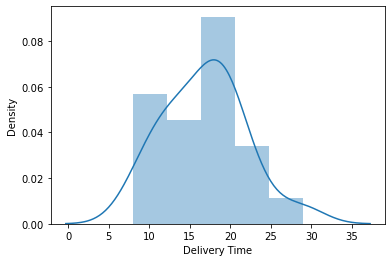

In [17]:
sns.distplot(del_data['Delivery Time'])

C:\Users\kamali\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

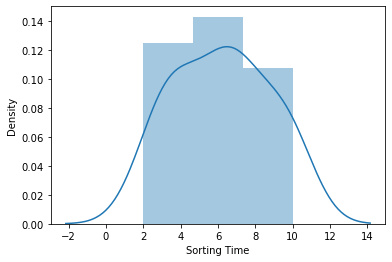

In [19]:
sns.distplot(del_data['Sorting Time'])

In [22]:
del_data= del_data.rename(columns = {'Delivery Time': 'DT', 'Sorting Time': 'ST'}, inplace = False)

In [23]:
del_data

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [24]:
import statsmodels.formula.api as smf
model = smf.ols("DT~ST",data = del_data).fit()

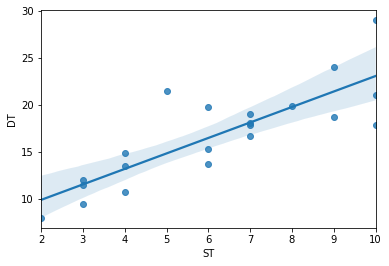

In [25]:
sns.regplot(x="ST", y="DT", data=del_data);

In [26]:
#Coefficients
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [27]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept    3.823349
ST           6.387447
dtype: float64 
 Intercept    0.001147
ST           0.000004
dtype: float64


In [28]:
# Evaluation of a model
model.aic,model.rsquared

(106.71400170798609, 0.6822714748417231)

#### Insight:
* The AIC(Akaike Information Criterion) of a linear model is 106.714
* The R squared value of a linear model is 0.6822 =  68.22%.